<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hypothesis Testing**


Estimated time needed: **30** minutes


Leveraging customer information is of paramount importance for most businesses. Imagine that you are an insurance analyst (actuarian) who needs to assess the insurability or the risks of his/her customers. Part of your job is to look at customer attributes such as age, sex, BMI, smokers/non-smokers, location, etc., and to use them in your decision-making process on whether to churn or approve their claims.

This lab will guide you through the series of steps in hypothesis testing to help you decide, using the statistical evidence, a certain effect of an attribute or a combination of attributes on the insurance claims. This lab will only introduce you to the initial steps in the decision making, before building the prediction models and classifiers.


## Objectives


After completing this lab you will be able to:


*   Understand the elements of hypothesis testing
    *   Choose a sample statistic
    *   Define hypothesis
    *   Set the decision criteria
    *   Evaluate and interpret the results


***


## **Setup**


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for visualizing the data.
*   [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for statistical analysis.
*   [`statsmodels`](https://www.statsmodels.org/stable/index.html/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for statistical analysis.


## **Installing Required Libraries**


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [2]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats 
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 

## **Reading and understanding our data**


For this lab, we will be using the <code>insurance.csv</code> file, hosted on IBM Cloud object.

This dataset contains information about age, sex, BMI, the number of children, whether the client is smoker or non-smoker, region where the client lives, and the charges to their insurance company.


Let's read the data into *pandas* data frame and look at the first 5 rows using the `head()` method.


In [ ]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/insurance.csv")
data.head()

By using `info` function, we will take a look at our types of data.


In [ ]:
data.info()

The `describe()` function provides the statistical information about the numeric variables.


In [ ]:
data.describe().T

According to the brief preview of our data, we will define the 'charges' to be our response variable, and 'age', 'sex', 'bmi', 'children', 'smoker', and 'region' to be our predictor variables. In this lab, we will test how our predictor variables influence the insurance 'charges'.


## **Steps in Hypothesis Testing**


## Example 1

In this first example, we will show how to prove (or disprove), with statistical evidence, that the BMI of females is different from that of males.


### 1. Choose a sample statistic


The first step in hypothesis testing is to choose a sample test statistic. Hypothesis testing allows us to check the sample statistic against a statistic of another sample or population. Let  𝜇1 be the population mean for BMI of males and 𝜇2 be the the population mean for BMI of females. We will compare these mean values, :$\mu\_{1}$ and $\mu\_{2}$, statistically.


### 2. Define hypothesis (Null and Alternative)


The next step is to define the hypothesis to be tested. Hypothesis is defined in two ways - null hypothesis and alternative hypothesis. Null hypothesis is a statistical hypothesis which assumes that the difference in observations is due to a random factor. It is denoted by Ho. Alternative hypothesis is the opposite of null hypothesis. It assumes that the difference in observations is the result of a real effect. The alternate hypothesis is denoted by H1.


$ 𝐻_{0}:\mu_{1}-\mu_{2} = 0 $ There is no difference between the BMI of male and BMI of female. \
$ 𝐻_{A}:\mu_{1}-\mu_{2} != 0 $ There is difference between the BMI of male and BMI of female.


The equal sign in the null hypothesis indicates that it is a 2-tailed test.


### 3. Set the decision criteria


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Hypothesis_Testing_3.png)


To set the criteria for a decision, we state the level of significance for a test. It could be 5%, 1% or 0.5%. Based on the level of significance, we can make a decision whether to accept the null hypothesis and reject the alternate, and vise versa.

The diagram above describes the principles of hypothesis testing. We will choose 5% significance level. Therefore, our $ \alpha=0.05 $. Since we have a 2-tailed test, we have to divide alpha by 2, which gives us 0.025. So, if the calculated p-value is less than alpha, we will reject the null hypothesis. The significance level is based on the business requirements. If you would like to learn more about the statistical significance, please visit this [wikipedia link](https://en.wikipedia.org/wiki/Statistical_significance?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).

In this lab, we will use one of the t-test, z-score, f-score or chi-squared statistics to evaluate our results.

A t-test is used for testing the mean of one population against a standard or comparing the means of two populations if you do not know standard deviation of the the population and when you have a limited sample (n < 30). If you know the standard deviation of the populations , you may use a z-test.

A z-test is used for testing the mean of a population versus a standard, or comparing the means of two populations, with large (n ≥ 30) samples, whether you know the population standard deviation or not. It is also used for testing the proportion of some characteristic versus a standard proportion, or comparing the proportions of two populations.

An f-test is used to compare variances between 2 populations. The samples can be any size. It is the basis of ANOVA.

chi-squared test is used to determine whether there is a statistically significant difference between the expected and the observed frequencies in one or more categories of a contingency table. A contingency table is a tabular representation of categorical data. It shows the frequency distribution of the variables.

To learn more about [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01), [z-score](), [f-score](https://en.wikipedia.org/wiki/F-test?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) or [chi-squared](https://en.wikipedia.org/wiki/Chi-squared_test?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) statistics and [contingency tables](https://en.wikipedia.org/wiki/Contingency_table?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01), please visit their corresponding wikipedia links.


### 4. Evaluate and interpret the result


First, let's get all observations for females and males by using the `loc()` function.


In [7]:
female=data.loc[data.sex=="female"]
male=data.loc[data.sex=="male"]

Now, let's select the bmi values for females and males.


In [8]:
f_bmi = female.bmi
m_bmi = male.bmi

Now, we will plot the distribution of 'bmi' values for females and males using seaborn's `distplot()` function.


<Axes: xlabel='bmi', ylabel='Density'>

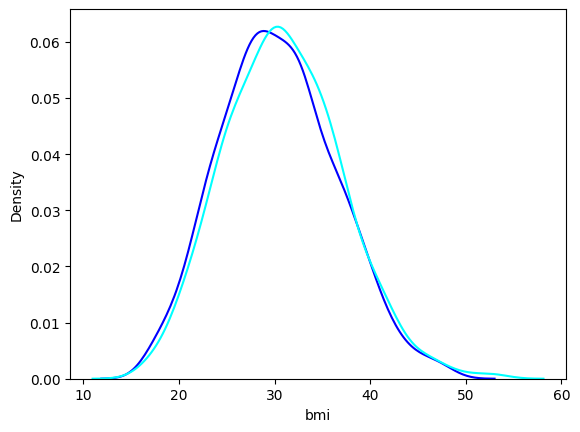

In [18]:
sns.kdeplot(f_bmi,color='blue')
sns.kdeplot(m_bmi,color='cyan')

From the graph, we already see that the two distributions are very similar.


Now, let's calculate the mean values for females and males bmi.


In [19]:
female.bmi.mean()

30.37774924471299

In [20]:
male.bmi.mean()

30.943128698224854

Next, we will obtain our statistics, t-value and p-value. We will use `scipy.stats` library and `ttest_ind()` function to calculate these parameters.


In [21]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(m_bmi, f_bmi)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  1.696752635752224 , p_value1 =  0.08997637178984934


Next, although optional, it is useful to print 'if/else' statements to make our conclusions about the the hypothesis.


In [22]:
if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no difference between bmi of females and bmi of males.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is a difference between bmi of females and bmi of males.")

Conclusion: since p_value 0.08997637178984934 is greater than alpha 0.05 
Fail to reject the null hypothesis that there is a difference between bmi of females and bmi of males.


Conclusion: We fail to reject the null hypothesis and can conclude that there is no difference between the female and male bmi.


## Example 2

In this example, we would like to prove (or disprove) that the medical claims made by the people who smoke are greater than those who don't.


We will compare the mean values (𝜇) of population of people who smoke and those who do not smoke. First, we need to calculate the mean values of smoking and non smoking populations.


In [23]:
smoker = data.loc[data.smoker=="yes"]
smoker_char = smoker.charges
sch_mean = smoker_char.mean()
sch_mean

32050.23183153284

In [25]:
nonsmoker = data.loc[data.smoker=="no"]
nonsmoker_char = nonsmoker.charges
nosch_mean=nonsmoker_char.mean()
nosch_mean

8434.268297856204

## Exercise 1

Calculate population mean of the nonsmokers.


Now, let's define our null and alternative hypothesis.


$ 𝐻_{0}:\mu_{1}<=\mu_{2} $ The average charges of smokers are less than or equal to nonsmokers. \
$ 𝐻_{A}:\mu_{1}>\mu_{2} $ The average charges of smokers are greater than or equal to nonsmokers.


The '>' sign in the alternate hypothesis indicates the test is right tailed. To compare the mean values of smoking and nonsmoking populations, we will use a t-test. If z-values (calculated from a t-test) fall into the area on the right side of a distribution curve, this would cause us to reject the null hypothesis.


Now, let's plot our smoking versus nonsmoking populations by using *seaborn* `boxplot()` function. It is always useful to have a visual representation of the data that we are working with.


[Text(0.5, 1.0, 'Fig:1 Smoker vs Charges')]

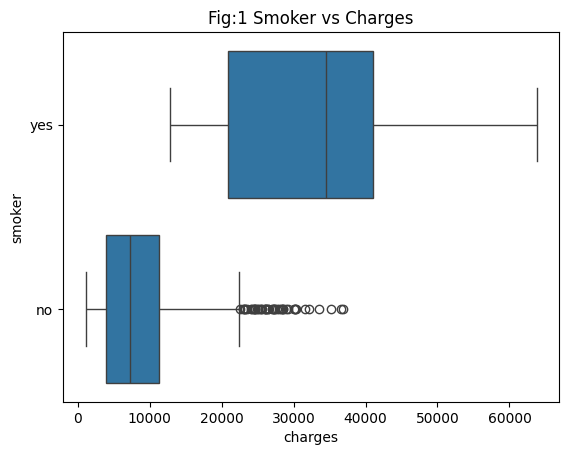

In [26]:
sns.boxplot(x=data.charges,y=data.smoker,data=data).set(title="Fig:1 Smoker vs Charges")

Now, we will calculate t-value and p-value of charges for smoking and nonsmoking populations.


In [27]:
alpha=0.05
t_val2, p_value2 = stats.ttest_ind(smoker_char, nonsmoker_char)
p_value_onetail=p_value2/2
print("t_value = {} , p_value ={} , p_value_onetail = {}".format(t_val2, p_value2, p_value_onetail))

t_value = 46.66492117272371 , p_value =8.271435842179102e-283 , p_value_onetail = 4.135717921089551e-283


## Exercise 2

Use `print()` function to state your conclusions based on the calculated statistics. What are the conclusions?


In [37]:
if p_value_onetail < alpha:
    print(f"Conclusion: Since p_value ({p_value_onetail}) is less than alpha ({alpha}), "
          "we reject the null hypothesis.")
else:
    print(f"Conclusion: Since p_value ({p_value_onetail}) is greater than alpha ({alpha}), "
          "we fail to reject the null hypothesis.")


Conclusion: Since p_value (4.135717921089551e-283) is less than alpha (0.05), we reject the null hypothesis.


In [34]:
if p_value2 <alpha :
    print("Conclusion:Since p_value {} is less than alpha {} ".format (p_value_onetail,alpha) )
    print("Reject null hypothesis that average charges for smokers are less than or equal to nonsmokers.")

else:
    print("Conclusion:Since p value {} is greater than alpha {} ".format (p_value_onetail,alpha))
    print("Failed to reject null hypothesis that average charges for smokers are less than nonsmoker.")

Conclusion:Since p_value 4.135717921089551e-283 is less than alpha 0.05 
Reject null hypothesis that average charges for smokers are less than or equal to nonsmokers.


## Example 3

In this example, using the statistical evidence, we will compare the BMI of women with no children, one child, and two children.


Now, let's define our null and alternative hypothesis.


$ 𝐻_{0}:\mu_{1}=\mu_{2}=\mu_{3} $ The mean BMI of women with no children , one child, and two children are the same. \
$ 𝐻_{A}: $ At least one of the means for women's BMI is not the same.


For this example, we will use a one-way ANOVA and f-score statistic to evaluate the variances of these three different populations. We will set alpha value to be 0.05.

First, we need to filter data for women with 0, 1 and 2 children.


In [38]:
female_children = female.loc[female['children']<=2]

We will use `groupby()` function to group the information by the number of children and bmi values.


In [48]:
female_children

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [46]:
female_children.groupby('children')['bmi'].mean()

children
0    30.361522
1    30.052658
2    30.649790
Name: bmi, dtype: float64

## Exercise 3

In this exercise, draw the *boxplots* to visualize the difference in bmi values between these 3 groups.


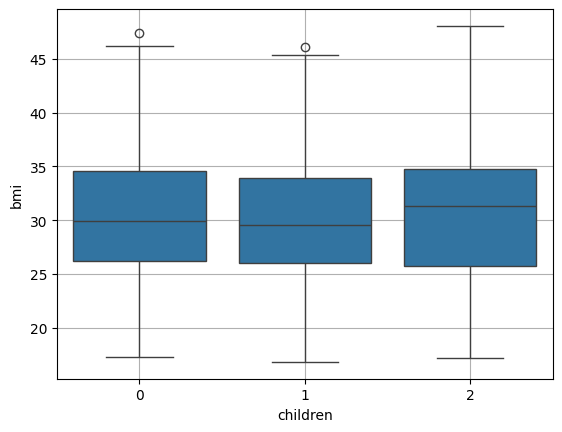

In [47]:
# Enter your code and run the cell
sns.boxplot(x="children",y="bmi",data=female_children)
plt.grid()
plt.show()

Now, we will construct the ANOVA table and check for each groups count (0,1,2 children) against the bmi values. We will use the ols (ordinary least squares) model for estimation of the unknown parameters. To learn more about OLS, please visit this wikipedia [link](https://en.wikipedia.org/wiki/Ordinary_least_squares?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).


In [49]:
formula = 'bmi ~ C(children)'
model = ols(formula, female_children).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(children),2.0,24.590123,12.295062,0.334472,0.715858
Residual,563.0,20695.661583,36.759612,NaN,NaN


Conclusion. p-value is 0.715858 and it is greater than the alpha (0.05), therefore we fail to reject the null hypothesis and conclude that the mean bmi of women with no children, one child, and two children are the same.


## Example 4

In this example, we will determine if the proportion of smokers is significantly different across the different regions.


First, let's define our null and alternative hypothesis.


$ 𝐻_{0} $: Smokers proportions are not significantly different across the different regions. \
$ 𝐻_{A} $: Smokers proportions are different across the different regions.


Here, we are comparing two different categorical variables, smokers/nonsmokers and different regions. For this type of analysis, we will perform a chi-square test.


First, we will calculate a contingency table between the proportions of smokers in different regions. For this, we will use *pandas* `crosstab()` function.


In [51]:
contingency= pd.crosstab(data.region, data.smoker)
contingency

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


Next, let's plot the distribution of nonsmokers/smokers across 4 different regions using the `plot()` function.


<Axes: xlabel='region'>

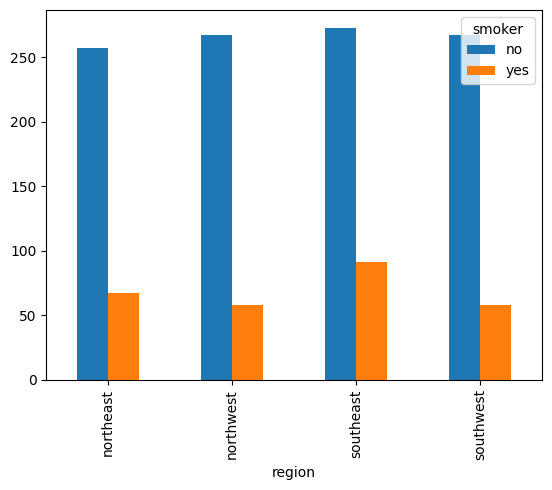

In [53]:
contingency.plot(kind='bar')

Now, using `chi2_contingency()` method, from the *scipy.stats* `chi2_contingency`, we will calculate chi-squared, p-value, degrees of freedom, and expected frequencies for our data.


In [54]:
chi2, p_val, dof, exp_freq = chi2_contingency(contingency, correction = False)
print('chi-square statistic: {} , p_value: {} , degree of freedom: {} ,expected frequencies: {} '.format(chi2, p_val, dof, exp_freq))

chi-square statistic: 7.343477761407071 , p_value: 0.06171954839170541 , degree of freedom: 3 ,expected frequencies: [[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]] 


## Exercise 4

Based on the above results, print your conclusion statements whether to reject or accept the null hypothesis. What are your conclusions about the hypothesis?


In [57]:
# Enter your code and run the cell
if p_val < alpha:
    print(f"Conclusion: Since p_value ({p_val}) is less than alpha ({alpha}), "
          "we reject the null hypothesis.")
    print("Therefore, the proportion of smokers is significantly different across regions.")
else:
    print(f"Conclusion: Since p_value ({p_val}) is greater than alpha ({alpha}), "
          "we fail to reject the null hypothesis.")
    print("Therefore, the proportion of smokers are different across regions.")

Conclusion: Since p_value (0.06171954839170541) is greater than alpha (0.05), we fail to reject the null hypothesis.
Therefore, the proportion of smokers are different across regions.


In [60]:
if (p_val < 0.05):
    print('Reject the null hypothesis, that the smokers proportions are not significantly different across the different regions')
else:
    print('Fail to reject the null hypothesis, that the smokers proportions are not significantly different across the different regions')

Fail to reject the null hypothesis, that the smokers proportions are not significantly different across the different regions


Conclusion: We failed to reject that the proportions of smokers are not significantly different across different regions. Therefore, the proportions of smokers is not significantly different across different regions for now.

### Viable Outcomes of the Hypothesis Test

When conducting a hypothesis test with the following hypotheses:

- **Null Hypothesis (\( H_0 \))**: *Smokers proportions are not significantly different across the different regions.*
- **Alternative Hypothesis (\( H_A \))**: *Smokers proportions are different across the different regions.*

There are two primary outcomes from the test:

1. **Rejecting the Null Hypothesis (\( H_0 \))**
2. **Failing to Reject the Null Hypothesis (\( H_0 \))**

Additionally, there are two potential **Type** errors associated with these outcomes:

- **Type I Error**
- **Type II Error**

#### 1. Rejecting the Null Hypothesis (\( H_0 \))

- **Decision**: *Reject \( H_0 \)*
- **Conclusion**: There is sufficient evidence to support the alternative hypothesis (\( H_A \)).
- **Interpretation**: *Smokers proportions are significantly different across the different regions.*
  
**Example Output from Code:**


In [ ]:
Conclusion: Since p_value (0.03) is less than alpha (0.05), we reject the null hypothesis.
Therefore, the proportion of smokers is significantly different across regions.



#### 2. Failing to Reject the Null Hypothesis (\( H_0 \))

- **Decision**: *Fail to reject \( H_0 \)*
- **Conclusion**: There is insufficient evidence to support the alternative hypothesis (\( H_A \)).
- **Interpretation**: *Smokers proportions are not significantly different across the different regions.*

**Example Output from Code:**


In [ ]:
Conclusion: Since p_value (0.08) is greater than alpha (0.05), we fail to reject the null hypothesis.
Therefore, the proportion of smokers is not significantly different across regions.



#### Understanding Type I and Type II Errors

While the above outcomes cover the possible decisions, it's essential to understand the potential errors that can occur in hypothesis testing:

1. **Type I Error (\( \alpha \))**
   - **Definition**: Rejecting the null hypothesis when it is actually true.
   - **Implication**: Concluding that there is a significant difference in smokers proportions across regions when there isn't one.
   - **Example Scenario**:
     - \( H_0 \) is true (no difference in proportions).
     - Due to random chance or sample variability, the test incorrectly rejects \( H_0 \).
   - **Probability**: Controlled by the significance level (\( \alpha \)), commonly set at 0.05 (5%).

2. **Type II Error (\( \beta \))**
   - **Definition**: Failing to reject the null hypothesis when the alternative hypothesis is actually true.
   - **Implication**: Concluding that there is no significant difference in smokers proportions across regions when there actually is one.
   - **Example Scenario**:
     - \( H_A \) is true (there is a difference in proportions).
     - Due to insufficient sample size or high variability, the test fails to reject \( H_0 \).
   - **Probability**: Denoted by \( \beta \), which depends on the test's power (1 - \( \beta \)).

#### Summary of Outcomes

| **Decision**                  | **Conclusion**                                              | **Error Type if Incorrect** |
|-------------------------------|-------------------------------------------------------------|------------------------------|
| **Reject \( H_0 \)**          | Smokers proportions are significantly different across regions. | Type I Error                 |
| **Fail to reject \( H_0 \)**  | Smokers proportions are not significantly different across regions. | Type II Error                |

#### Important Notes

- **Failing to Reject \( H_0 \) ≠ Accepting \( H_0 \)**:
  - *Failing to reject* means there isn't enough evidence to support \( H_A \), not that \( H_0 \) is true.
  - \( H_0 \) remains a plausible explanation but isn't proven.

- **Setting the Significance Level (\( \alpha \))**:
  - Commonly set at 0.05 (5%), representing a 5% risk of committing a Type I Error.
  - Adjusting \( \alpha \) affects the likelihood of Type I and Type II Errors.

- **Power of the Test**:
  - The probability of correctly rejecting \( H_0 \) when \( H_A \) is true.
  - High power reduces the risk of a Type II Error.

#### Visual Representation

Here's a simple table to visualize the decisions and potential errors:

| **Actual Status**           | **Decision**          | **Outcome**                                      |
|-----------------------------|-----------------------|--------------------------------------------------|
| \( H_0 \) is **True**       | Reject \( H_0 \)      | **Type I Error**: Incorrectly rejecting \( H_0 \) |
| \( H_0 \) is **True**       | Fail to reject \( H_0 \)| Correct Decision                                  |
| \( H_A \) is **True**       | Reject \( H_0 \)      | Correct Decision                                  |
| \( H_A \) is **True**       | Fail to reject \( H_0 \)| **Type II Error**: Incorrectly failing to reject \( H_0 \) |

Understanding these outcomes and errors is crucial for interpreting the results of your hypothesis tests accurately and making informed decisions based on statistical evidence.

### Understanding When to "Accept" the Null Hypothesis in Hypothesis Testing

In hypothesis testing, it's crucial to accurately interpret the results to make informed decisions. Let's clarify the terminology and understanding related to accepting or rejecting the null hypothesis (\( H_0 \)).

#### **Your Hypotheses:**
- **Null Hypothesis (\( H_0 \))**: *Smokers proportions are not significantly different across the different regions.*
- **Alternative Hypothesis (\( H_A \))**: *Smokers proportions are different across the different regions.*

#### **Your Code Snippet:**


In [ ]:
# Enter your code and run the cell
if p_val < alpha:
    print(f"Conclusion: Since p_value ({p_val}) is less than alpha ({alpha}), "
          "we reject the null hypothesis.")
    print("Therefore, the proportion of smokers is significantly different across regions.")
else:
    print(f"Conclusion: Since p_value ({p_val}) is greater than alpha ({alpha}), "
          "we fail to reject the null hypothesis.")
    print("Therefore, the proportion of smokers are different across regions.")



#### **Key Concepts:**

1. **Rejecting the Null Hypothesis (\( H_0 \)):**
   - **When**: When the p-value (\( p\_val \)) is less than the significance level (\( \alpha \)).
   - **Interpretation**: There is sufficient evidence to support the alternative hypothesis (\( H_A \)).
   - **Conclusion Example**:
     ```
     Conclusion: Since p_value (0.03) is less than alpha (0.05), we reject the null hypothesis.
     Therefore, the proportion of smokers is significantly different across regions.
     ```

2. **Failing to Reject the Null Hypothesis (\( H_0 \)):**
   - **When**: When the p-value (\( p\_val \)) is greater than or equal to the significance level (\( \alpha \)).
   - **Interpretation**: There is insufficient evidence to support the alternative hypothesis (\( H_A \)).
   - **Important**: **Failing to reject \( H_0 \) does not mean you accept \( H_0 \).** It means you do not have enough evidence to conclude that \( H_A \) is true.
   - **Conclusion Example**:
     ```
     Conclusion: Since p_value (0.08) is greater than alpha (0.05), we fail to reject the null hypothesis.
     Therefore, the proportion of smokers is not significantly different across regions.
     ```

#### **Do We "Accept" the Null Hypothesis?**

**Technically, in formal hypothesis testing, we do not "accept" the null hypothesis.** Here's why:

- **Failing to Reject \( H_0 \)**:
  - **Meaning**: You don't have sufficient evidence against \( H_0 \) based on your data and chosen significance level (\( \alpha \)).
  - **Implication**: \( H_0 \) remains a plausible explanation, but it is not proven true.
  - **Reason**: Absence of evidence is not evidence of absence. Just because your data didn't show a significant effect doesn't mean there is no effect; it might be that your sample size was too small or the effect size was too subtle to detect.

- **Accepting \( H_0 \)**:
  - **Not Standard Practice**: In statistical methodology, saying "accept \( H_0 \)" implies that \( H_0 \) is true, which is not something hypothesis testing can confirm.
  - **Potential Misinterpretation**: It can be misleading because failing to reject \( H_0 \) doesn't provide proof that \( H_0 \) is true, only that there isn't strong enough evidence against it.

#### **Analogy: Jury System**

Consider the legal analogy of a jury trial:

- **\( H_0 \)**: *The defendant is innocent.*
- **\( H_A \)**: *The defendant is guilty.*

**Outcomes:**

1. **Guilty Verdict (\( p\_val < \alpha \))**:
   - **Action**: Reject \( H_0 \) (innocent).
   - **Conclusion**: The jury finds the defendant guilty based on the evidence.

2. **Not Guilty Verdict (\( p\_val \geq \alpha \))**:
   - **Action**: Fail to reject \( H_0 \).
   - **Conclusion**: The jury does not have enough evidence to declare the defendant guilty.
   - **Important**: **The defendant is not automatically considered innocent;** it just means the prosecution didn't prove guilt beyond the set significance level.

#### **Practical Implications for Your Analysis**

- **When You Fail to Reject \( H_0 \)**:
  - **Action in Code**:
    ```python
    else:
        print(f"Conclusion: Since p_value ({p_val}) is greater than alpha ({alpha}), "
              "we fail to reject the null hypothesis.")
        print("Therefore, the proportion of smokers is not significantly different across regions.")
    ```
  - **Interpretation**: Based on your data and the chosen \( \alpha \), you do not have enough evidence to claim that smoker proportions differ across regions.
  - **Next Steps**:
    - **Review Sample Size**: Maybe increase the sample size to detect smaller effects.
    - **Check Assumptions**: Ensure that the test assumptions are met (e.g., independence, sample size adequacy).
    - **Consider Effect Size**: Even if statistically insignificant, the effect might be practically significant.

- **When You Reject \( H_0 \)**:
  - **Action in Code**:
    ```python
    if p_val < alpha:
        print(f"Conclusion: Since p_value ({p_val}) is less than alpha ({alpha}), "
              "we reject the null hypothesis.")
        print("Therefore, the proportion of smokers is significantly different across regions.")
    ```
  - **Interpretation**: There is sufficient evidence to conclude that smoker proportions vary by region.
  - **Next Steps**:
    - **Investigate Further**: Explore which regions differ and by how much.
    - **Policy Implications**: Consider region-specific interventions or policies based on findings.

#### **Summary Table**

| **Decision**                  | **Conclusion**                                              | **Potential Error Type if Incorrect** |
|-------------------------------|-------------------------------------------------------------|---------------------------------------|
| **Reject \( H_0 \)**          | Smokers proportions are significantly different across regions. | Type I Error (False Positive)         |
| **Fail to Reject \( H_0 \)**  | Smokers proportions are not significantly different across regions. | Type II Error (False Negative)       |

#### **Takeaways**

- **Do Not Accept \( H_0 \)**: Instead, state that you fail to reject \( H_0 \) due to insufficient evidence.
- **Interpret Carefully**: Recognize the limitations of your test, such as sample size and effect size.
- **Communicate Clearly**: Use precise language to avoid misinterpretation of results.

#### **Example Code with Clarification**

Here's how you can update your code to reflect these concepts accurately:



In [ ]:
# Define significance level
alpha = 0.05

# Example p-value
p_val = 0.08  # This should be computed based on your test

# Hypothesis Testing Decision
if p_val < alpha:
    print(f"Conclusion: Since p_value ({p_val}) is less than alpha ({alpha}), "
          "we reject the null hypothesis.")
    print("Therefore, the proportion of smokers is significantly different across regions.")
else:
    print(f"Conclusion: Since p_value ({p_val}) is greater than or equal to alpha ({alpha}), "
          "we fail to reject the null hypothesis.")
    print("Therefore, there is no significant difference in the proportion of smokers across regions.")



**Output Example:**


In [ ]:
Conclusion: Since p_value (0.08) is greater than or equal to alpha (0.05), we fail to reject the null hypothesis.
Therefore, there is no significant difference in the proportion of smokers across regions.



#### **Final Note**

Understanding the nuances of hypothesis testing ensures that you interpret your statistical analyses correctly and make informed decisions based on evidence rather than assumptions. Always frame your conclusions within the context of your data and the limitations of your analysis.

## Author


[Svitlana Kramar](https://www.linkedin.com/in/svitlana-kramar/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description   |
| ----------------- | ------- | ---------- | -------------------- |
| 2022-01-10        | 0.1     | Svitlana   | Updated introduction |


Copyright © 2020 IBM Corporation. All rights reserved.
